## Percetrón Simple

El objetivo de esta práctica es que hagan su propia implementación de un perceptrón simple y que la utilicen para experimentar con distintas variantes sobre diferentes problemas.

Se recomienda siempre examinar de alguna forma los datos con los que se va a trabajar y tener un registro de la evolución del error durante el entrenamiento para poder identificar más rapidamente potenciales problemas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Funciones lógicas

Crear un conjunto de datos cuya entrada represente todas las combinaciones posibles para 2 variables binarias o bipolares (por ejemplo [[0,0],[0,1]...]) y también con dos variables en los datos objetivo de manera que la primer variable represente la tabla de verdad del **AND** y la segunda variable la tabla de verdad del **OR**.

Usar estos datos para entrenar un modelo de perceptrón simple usando la implementación anterior.

In [7]:
x = np.array([[-1, -1, -1],
              [-1, +1, -1],
              [+1, -1, -1],
              [+1, +1, -1]])

z = np.array([[-1, -1],  # AND: -1, OR: -1
              [-1, +1],  # AND: -1, OR: +1
              [-1, +1],  # AND: -1, OR: +1
              [+1, +1]]) # AND: +1, OR: +1

w = np.random.normal(0, 0.1, size=(3,2))

lr = 1e-4
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    y = np.sign(np.dot(x, w))                   # Predicción
    d = z - y                                   # Distancia entre predicción y label
    dw = np.dot(x.T, d)                         # Ajuste de los pesos
    w += lr * dw                                # Actualizar los pesos
    e = np.mean(np.square(d))                   # Error cuadratico medio 
    E.append(e)                                 # Guardar historial de e
    
    t += 1
    if t % 100 == 0:
        print(t, e)

y = np.sign(np.dot(x, w))
print(y)
print(z)


100 1.0
200 1.0
300 0.5
[[-1. -1.]
 [-1.  1.]
 [-1.  1.]
 [ 1.  1.]]
[[-1 -1]
 [-1  1]
 [-1  1]
 [ 1  1]]


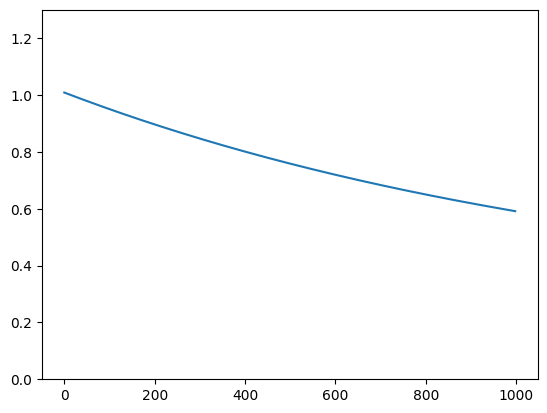

In [47]:
# Draw error for iterations between 0 and 999
plt.plot(E)
plt.ylim(0, 1.3)
plt.show()

In [40]:
x = np.array([[-1, -1, -1],
              [-1, +1, -1],
              [+1, -1, -1],
              [+1, +1, -1]])

z = np.array([[-1, -1],  # AND: -1, OR: -1
              [-1, +1],  # AND: -1, OR: +1
              [-1, +1],  # AND: -1, OR: +1
              [+1, +1]]) # AND: +1, OR: +1

# w = np.random.normal(0, 0.1, size=(3, 2))
w = np.random.normal(0, 0.1, size=(x.shape[1], z.shape[1])) # 3 x 2

lr = 1e-4
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    #y = np.sign(np.dot(x, w))                   # Predicción
    y = x.dot(w)                                # Predicción
    # print(x)
    # print(w)
    # print(y)
    # print(z)
    
    # d = z - y                                   # Estimación, distancia entre predicción y label
    d = y - z                                   # Distancia entre predicción y label (tiene 4x2)
    
    #dw = np.dot(x.T, d)                         # Ajuste de los pesos
    #w += lr * dw                                # Actualizar los pesos
    dw = np.dot(x.T, d)                         # Cuanto ajustar los pesos para minimizar la distancia (d tiene 4x2, x tiene 4x3, x.T tiene 3x4, dw tiene 3x2, igual a los pesos)
    w = w - (lr * dw)                           # Actualizar los pesos a razon de cambio lr
    
    e = np.mean(np.square(d))                   # Error cuadratico medio 
    E.append(e)                                 # Guardar historial de e

    t += 1
    if t % 100 == 0:
        print(t, e)

y = np.sign(np.dot(x, w))
print(y)
print(z)


100 0.9508030746689755
200 0.896912420382382
300 0.8471658726564065
400 0.8012447562139888
500 0.7588549014056922
600 0.7197247597654806
700 0.68360366447729
800 0.6502602246089888
900 0.6194808428272148
[[-1. -1.]
 [-1.  1.]
 [-1.  1.]
 [ 1.  1.]]
[[-1 -1]
 [-1  1]
 [-1  1]
 [ 1  1]]


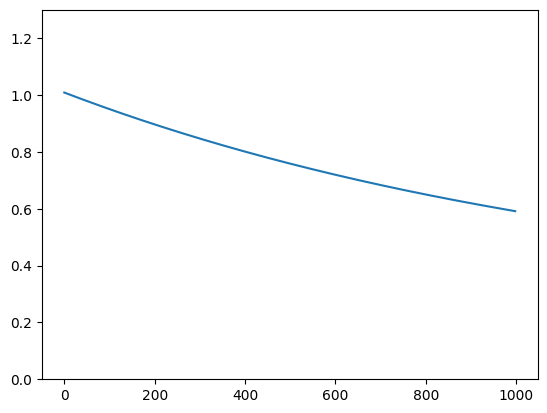

In [48]:
# Draw error for iterations between 0 and 999
plt.plot(E)
plt.ylim(0, 1.3)
plt.show()

Crear un conjunto de datos similar pero con una sola variable objetivo que represente la tabla de verdad de **XOR**.

Usar estos datos para tratar de entrenar un perceptrón simple implementado.

In [21]:
x = np.array([[-1, -1, 1],
              [-1, +1, 1],
              [+1, -1, 1],
              [+1, +1, 1]])

z = np.array([[-1],  # XOR: -1
              [+1],  # XOR: +1
              [+1],  # XOR: +1
              [-1]]) # XOR: -1

w = np.random.normal( 0, 0.1, size=(3,1))

lr = 1e-4
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    y = np.sign(np.dot(x, w))                   # Predicción
    d = z - y                                   # Estimación, distancia entre predicción y label
    dw = np.dot(x.T, d)                         # Ajuste de los pesos
    w += lr * dw                                # Actualizar los pesos
    e = np.mean(np.square(d))                   # Error cuadratico medio 
    E.append(e)                                 # Guardar historial de e

    t += 1
    if t % 100 == 0:
        print(t, e)

y = np.sign(np.dot(x, w))
print(y)
print(z)


100 2.0
200 3.0
300 2.0
400 3.0
500 2.0
600 2.0
700 2.0
800 1.0
900 1.0
[[-1.]
 [-1.]
 [ 1.]
 [-1.]]
[[-1]
 [ 1]
 [ 1]
 [-1]]


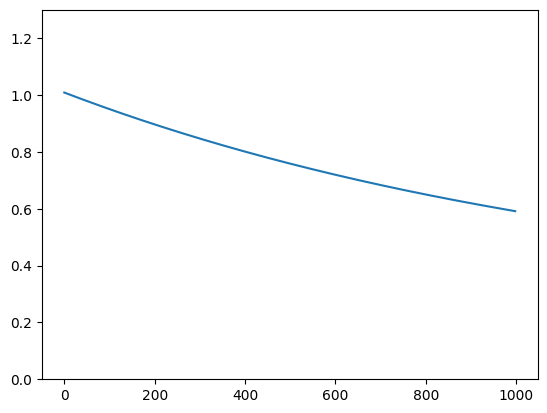

In [49]:
# Draw error for iterations between 0 and 999
plt.plot(E)
plt.ylim(0, 1.3)
plt.show()

Experimentar variando entre funciones de activación y datos binarios y bipolares, con funciones sigmoideas y escalón, y con distintos coeficientes de aprendizaje.

### 2. Clasificación de caracteres

Utilizar el archivo `letras.txt` proporcionado como datos de entrada y crear un conjunto de datos objetivo de 26 variables, de modo que para cada instancia correspondiente a cada letra la variable objetivo valga 1 y todas las demás 0.

Entrenar un perceptrón con estos datos.

Notar que si la función de transferencia utilizada es la sigmoidea logística es posible tomar la unidad de salida con mayor nivel de activación como la clase (o letra) elegida por el modelo.
Tener en cuenta esta medida de precisión en la clasificación hecha por el modelo.

In [92]:
letras = np.loadtxt('letras.txt')

L = letras.reshape((26,5,5)) # Esto crea una matriz de 26x5x5
x = letras.reshape((26,25)) # Esto crea una matriz de 26x25, lo que significa que cada matriz que era de 5x5 fue convertido a un vector de 25 elementos, entonces tengo 26 filas de 25 elementos cada una por cada letra
# x[x == 0] = -1 # Esto cambia los ceros por -1
z = np.diag(np.ones(26)) # Esto crea una matriz de 26x26 con unos en la diagonal
z[z == 0] = -1 # Esto cambia los ceros por -1

In [93]:
print(L[0])
print(x[0])
print(z[0])

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]]
[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1.]
[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.]


In [94]:
# A cada fila de x le agregamos un -1 al final
print(x[0])
x = np.c_[x, -np.ones(26)]
print(x[0])
print(x.shape)

[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1.]
[ 0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  1.  1.  0.  0.  0.  1. -1.]
(26, 26)


In [109]:
w = np.random.normal(0, 0.1, size=(26, 26))

lr = 1e-3
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    y = np.sign(np.dot(x, w))                   # Prediccion con tangente hiperbolica, salida entre -1 y 1
    d = z - y                                   # Estimación, distancia entre predicción y label
    dw = np.dot(x.T, d)                         # Ajuste de los pesos
    w += lr * dw                                # Actualizar los pesos
    e = np.mean(np.square(d))                   # Error cuadratico medio 
    E.append(e)                                 # Guardar historial de e

    t += 1
    if t % 100 == 0:
        # print(np.argmax(y, axis=1))
        print(t, e)

y = np.sign(np.dot(x, w))
predicciones = np.argmax(y, axis=1)
objetivo = np.argmax(z, axis=1)

print(predicciones)
print(objetivo)

precision = np.mean(predicciones == objetivo)
print(f'Precisión del modelo: {precision * 100:.2f}%')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  2 15 16 17 18 19 20 21 22 23
 24 25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Precisión del modelo: 96.15%


Introducir ruido en los datos de entrada para ver cómo es afectada la precisión en la clasificación.
La proporción de ruido puede estar determinada por una variable `p` que tome valores entre 0 y 1.
Por ejemplo, si `x` son los datos, se puede testear el modelo con los datos con ruido `xr`.

In [114]:
p = 0.5 # Ruido
xr = x + np.random.uniform( 0, p, x.shape)

lr = 1e-3
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    y = np.sign(np.dot(x, w))                   # Prediccion con tangente hiperbolica, salida entre -1 y 1
    d = z - y                                   # Estimación, distancia entre predicción y label
    dw = np.dot(x.T, d)                         # Ajuste de los pesos
    w += lr * dw                                # Actualizar los pesos
    e = np.mean(np.square(d))                   # Error cuadratico medio 
    E.append(e)                                 # Guardar historial de e

    t += 1
    if t % 100 == 0:
        # print(np.argmax(y, axis=1))
        print(t, e)

y = np.sign(np.dot(x, w))
predicciones = np.argmax(y, axis=1)
objetivo = np.argmax(z, axis=1)

print(predicciones)
print(objetivo)

precision = np.mean(predicciones == objetivo)
print(f'Precisión del modelo: {precision * 100:.2f}%')

[ 0  1  0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Precisión del modelo: 96.15%


Crear conjuntos de datos objetivo que en lugar de tener 26 variables binarias estén compuestos por 5 variables binarias.
Experimentar con distintas variantes aleatorias de estos datos.

In [119]:
letras = np.loadtxt('letras.txt')

L = letras.reshape((26,5,5))
x = letras.reshape((26,25)) * 2 - 1
# z = np.diag(np.ones(26)) # Esto crea una matriz de 26x26 con unos en la␣↪diagonal
# Generar el objetivo binario de 00001 a 11010 (valores decimales de 1 a 26)
z = np.array([list(map(int, format(i, '05b'))) for i in range(1, 27)])
z[z == 0] = -1
print(x[0])
print(z[0])

[-1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.]
[-1 -1 -1 -1  1]


In [120]:
# A cada fila de x le agregamos un -1 al final
print(x[0])
x = np.c_[x, -np.ones(26)]
print(x[0])
print(x.shape)

[-1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.]
[-1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1. -1.]
(26, 26)


In [122]:
# Inicializar pesos
w = np.random.normal(0, 0.1, size=(26, 5))  # 25 entradas, 5 salidas (5 bits)

# Parámetros de entrenamiento
lr = 1e-3
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    y = np.sign(np.dot(x, w))                   # Prediccion con tangente hiperbolica, salida entre -1 y 1
    d = z - y                                   # Estimación, distancia entre predicción y label
    dw = np.dot(x.T, d)                         # Ajuste de los pesos
    w += lr * dw                                # Actualizar los pesos
    e = np.mean(np.square(d))                   # Error cuadratico medio 
    E.append(e)                                 # Guardar historial de e

    t += 1
    if t % 100 == 0:
        # print(np.argmax(y, axis=1))
        print(t, e)

# Evaluación del modelo
y = np.sign(np.dot(x, w))
predicciones = np.round(y).astype(int)
print("Predicciones:\n", predicciones)
print("Objetivo:\n", z)

# Comparar predicciones con el objetivo y calcular precisión
precision = np.mean(np.all(predicciones == z, axis=1))
print(f'Precisión del modelo: {precision * 100:.2f}%')

100 0.09230769230769231
Predicciones:
 [[-1 -1 -1 -1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1  1  1]
 [-1 -1  1 -1 -1]
 [-1 -1  1 -1  1]
 [-1 -1  1  1 -1]
 [-1 -1  1  1  1]
 [-1  1 -1 -1 -1]
 [-1  1 -1 -1  1]
 [-1  1 -1  1 -1]
 [-1  1 -1  1  1]
 [-1  1  1 -1 -1]
 [-1  1  1 -1  1]
 [-1  1  1  1 -1]
 [-1  1  1  1  1]
 [ 1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1]
 [ 1 -1 -1  1  1]
 [ 1 -1  1 -1 -1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1  1 -1]
 [ 1 -1  1  1  1]
 [ 1  1 -1 -1 -1]
 [ 1  1 -1 -1  1]
 [ 1  1 -1  1 -1]]
Objetivo:
 [[-1 -1 -1 -1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1  1  1]
 [-1 -1  1 -1 -1]
 [-1 -1  1 -1  1]
 [-1 -1  1  1 -1]
 [-1 -1  1  1  1]
 [-1  1 -1 -1 -1]
 [-1  1 -1 -1  1]
 [-1  1 -1  1 -1]
 [-1  1 -1  1  1]
 [-1  1  1 -1 -1]
 [-1  1  1 -1  1]
 [-1  1  1  1 -1]
 [-1  1  1  1  1]
 [ 1 -1 -1 -1 -1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1]
 [ 1 -1 -1  1  1]
 [ 1 -1  1 -1 -1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1  1 -1]
 [ 1 -1  1  1  1]
 [ 1  1 -1 -1 -1]
 [ 1  1 -1 -1  1]
 [ 1  1 -1  1 -1]]
Precisión de